### Score: 25

Q1.[8]

Q2.[9+8]

In [1]:
# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline

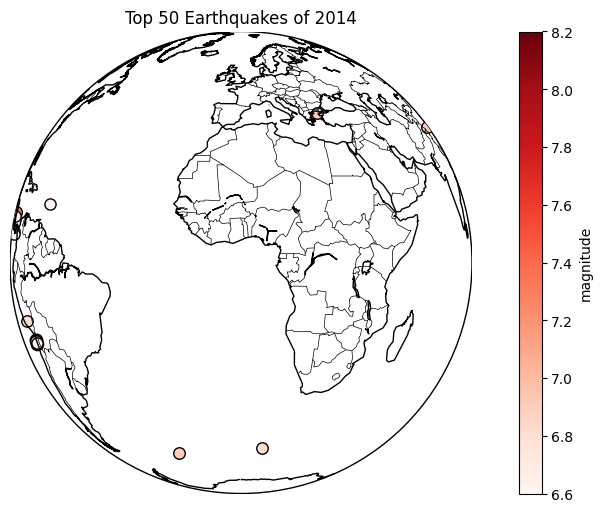

In [7]:
#1
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# 读取CSV文件
file_path = r'C:\Users\zjm\Desktop\ESE_5023\usgs_earthquakes.csv'
earthquakes = pd.read_csv(file_path)

# 确保'time'列是日期时间格式
earthquakes['time'] = pd.to_datetime(earthquakes['time'])

# 筛选2014年的地震数据
earthquakes_2014 = earthquakes[earthquakes['time'].dt.year == 2014]

# 按震级排序并获取前50次地震
top_50_2014 = earthquakes_2014.nlargest(50, 'mag')

# 创建地图
plt.figure(figsize=(12, 6))
m = Basemap(projection='ortho', lat_0=0, lon_0=0, resolution='c')

# 绘制海岸线和国家边界
m.drawcoastlines()
m.drawcountries()

# 绘制地震点
for index, row in top_50_2014.iterrows():
    x, y = m(row['longitude'], row['latitude'])
    size = row['mag'] * 10  # 震级乘以10作为点的大小
    m.scatter(x, y, s=size, c=row['mag'], cmap='Reds', edgecolor='k', vmin=6.6, vmax=8.2)

# 添加颜色条
plt.colorbar(label='magnitude', orientation='vertical')

# 设置标题
plt.title('Top 50 Earthquakes of 2014')

# 显示地图
# NOTE: 投影方式错误，请参考例图的投影 -2
plt.show()

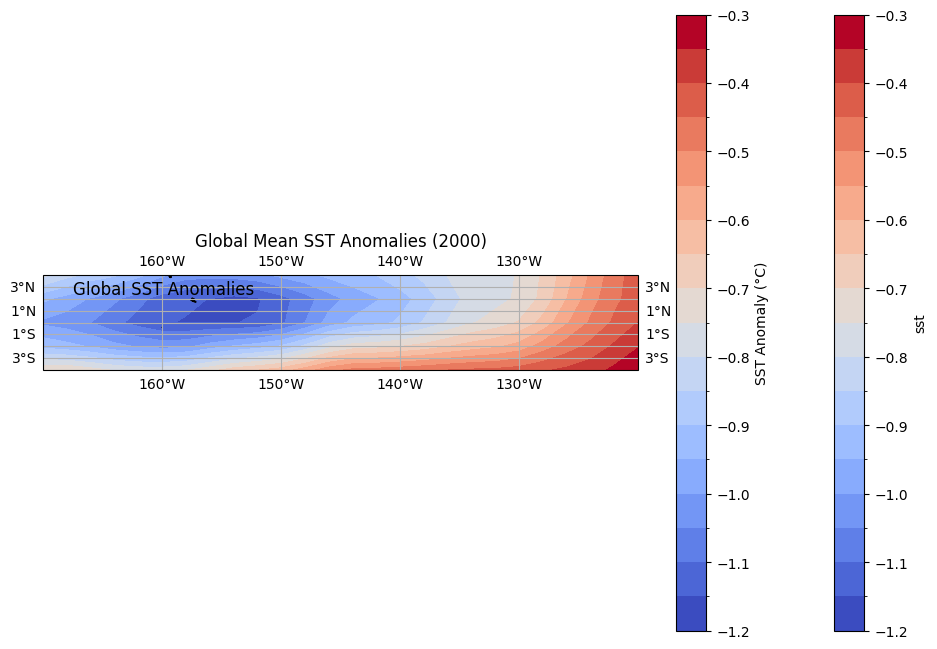

In [12]:
#2.1
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 读取 NetCDF 文件
file_path = r'D:\Work\ESE5023\nino_34_sst_anomalies.nc'
ds = xr.open_dataset(file_path)

# 选择 'sst' 变量
variable_name = 'sst'

# 获取特定时间范围的数据
start_date = '2000-01-01'
end_date = '2000-12-31'
selected_data = ds[variable_name].sel(time=slice(start_date, end_date))

# 计算平均值，去除 'month' 维度
mean_sst = selected_data.mean(dim=['time', 'month'])

# 创建全局地图
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# 绘制 SST 数据
im = mean_sst.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', levels=20)

# 添加网格线
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# 添加边界线
ax.add_feature(cfeature.COASTLINE)

# 添加标题
plt.title('Global Mean SST Anomalies (2000)')

# 添加颜色条
plt.colorbar(im, ax=ax, label='SST Anomaly (°C)')

# 添加注释
# NOTE: 这个是文本框，缺少注释 -1
plt.text(0.05, 0.95, 'Global SST Anomalies', transform=ax.transAxes, fontsize=12, verticalalignment='top')

# 显示地图
plt.show()

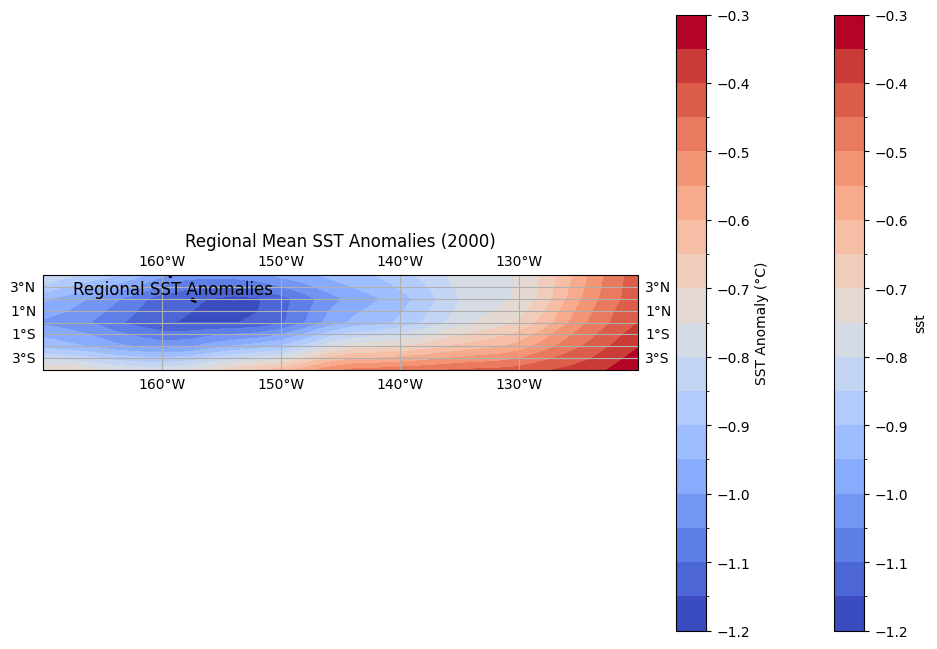

In [13]:
#2.2
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 读取 NetCDF 文件
file_path = r'D:\Work\ESE5023\nino_34_sst_anomalies.nc'
ds = xr.open_dataset(file_path)

# 选择 'sst' 变量
variable_name = 'sst'

# 获取特定时间范围的数据
start_date = '2000-01-01'
end_date = '2000-12-31'
selected_data = ds[variable_name].sel(time=slice(start_date, end_date))

# 计算平均值，去除 'month' 维度
mean_sst = selected_data.mean(dim=['time', 'month'])

# 定义区域范围
lon_min, lon_max = 190, 240
lat_min, lat_max = -5, 5

# 创建区域地图
plt.figure(figsize=(12, 8))
# NOTE: 应选择与2.1不同的投影方式　-1
ax = plt.axes(projection=ccrs.PlateCarree())

# 绘制 SST 数据
im = mean_sst.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max)).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', levels=20)

# 添加网格线
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# 添加边界线
ax.add_feature(cfeature.COASTLINE)

# 添加标题
plt.title('Regional Mean SST Anomalies (2000)')

# 添加颜色条
plt.colorbar(im, ax=ax, label='SST Anomaly (°C)')

# 添加注释
# NOTE: 这个是文本框，缺少注释 -1
plt.text(0.05, 0.95, 'Regional SST Anomalies', transform=ax.transAxes, fontsize=12, verticalalignment='top')

# 显示地图
plt.show()